In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

In [2]:
task1_image_filenames = [
    "TESI00.BMP",
    "TESI01.BMP",
    "TESI12.BMP",
    "TESI21.BMP",
    "TESI31.BMP",
    "TESI33.BMP"]

task2_image_filenames = [
    "TESI44.BMP",
    "TESI47.BMP",
    "TESI48.BMP",
    "TESI49.BMP",
    "TESI50.BMP",
    "TESI51.BMP",
    "TESI90.BMP",
    "TESI92.BMP",
    "TESI98.BMP"]

In [3]:
task1_type_result = {
    "TESI00.BMP" : {"A" : 2, "B" : 1},
    "TESI01.BMP" : {"A" : 2, "B" : 1},
    "TESI12.BMP" : {"A" : 2, "B" : 1},
    "TESI21.BMP" : {"A" : 1, "B" : 1},
    "TESI31.BMP" : {"A" : 1, "B" : 1},
    "TESI33.BMP" : {"A" : 2, "B" : 0}
}

In [4]:
task2_type_result = {
    "TESI44.BMP" : {"A" : 1, "B" : 0},
    "TESI47.BMP" : {"A" : 1, "B" : 1},
    "TESI48.BMP" : {"A" : 1, "B" : 1},
    "TESI49.BMP" : {"A" : 0, "B" : 1},
    "TESI50.BMP" : {"A" : 2, "B" : 1},
    "TESI51.BMP" : {"A" : 2, "B" : 1},
    "TESI90.BMP" : {"A" : 1, "B" : 1},
    "TESI92.BMP" : {"A" : 2, "B" : 1},
    "TESI98.BMP" : {"A" : 1, "B" : 1},
}

In [13]:
#Hough and orientation ?

#Euler and dilation ?

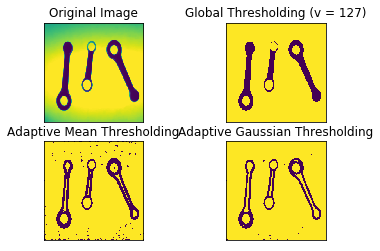

In [6]:

img = cv2.imread('../data/TESI00.BMP',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


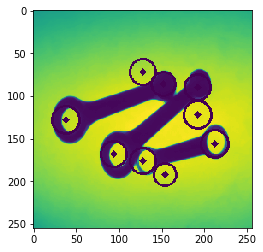

In [7]:
# Read image as gray-scale
img = cv2.imread('../data/TESI51.BMP', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 15, param1=200, param2=8, minRadius=12, maxRadius=17)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img_blur, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img_blur, (i[0], i[1]), 2, (0, 0, 255), 3)
plt.imshow(img_blur)

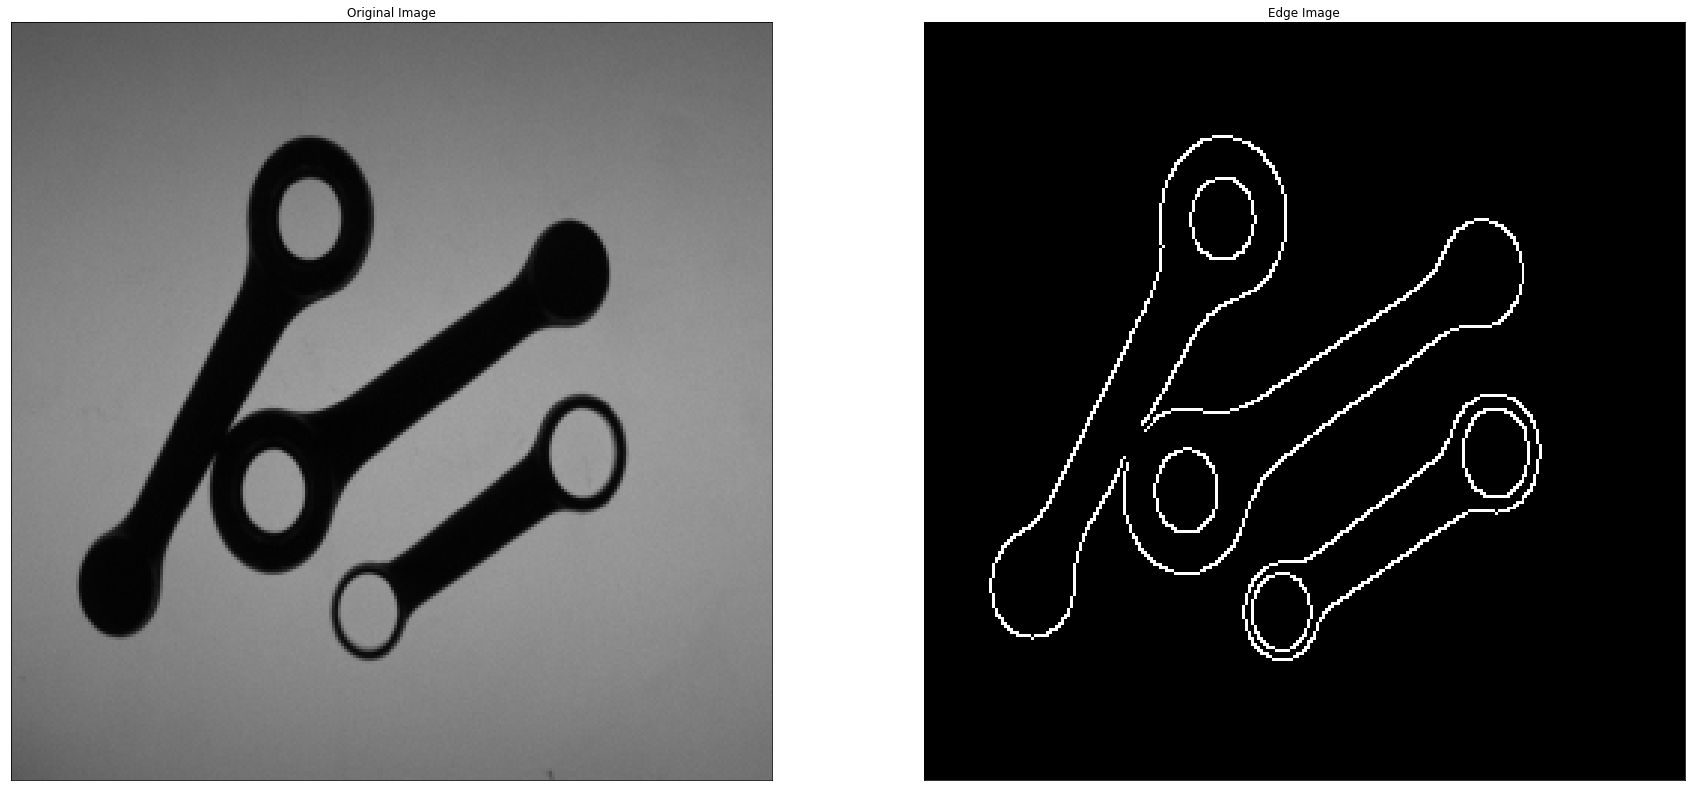

In [8]:
img = cv2.imread('../data/TESI50.BMP',  cv2.IMREAD_COLOR)
edges = cv2.Canny(img,100,200)
plt.figure(figsize=(30,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

[[[192.5 144.5  15.2]
  [ 94.5  63.5  16.4]
  [122.5 194.5  15.2]
  [185.5  86.5  16.4]
  [ 36.5 187.5  15.2]
  [ 87.5 168.5  15.2]
  [124.5 165.5  16.4]]]


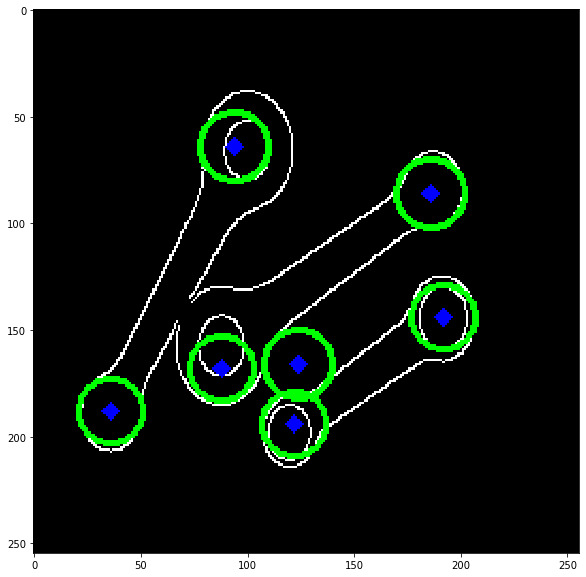

In [9]:
# Apply hough transform on the image
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 15, param1=200, param2=8, minRadius=12, maxRadius=17)

print(circles)

backtorgb = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(backtorgb, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(backtorgb, (i[0], i[1]), 2, (0, 0, 255), 3)
plt.figure(figsize=(20,10))
plt.imshow(backtorgb)

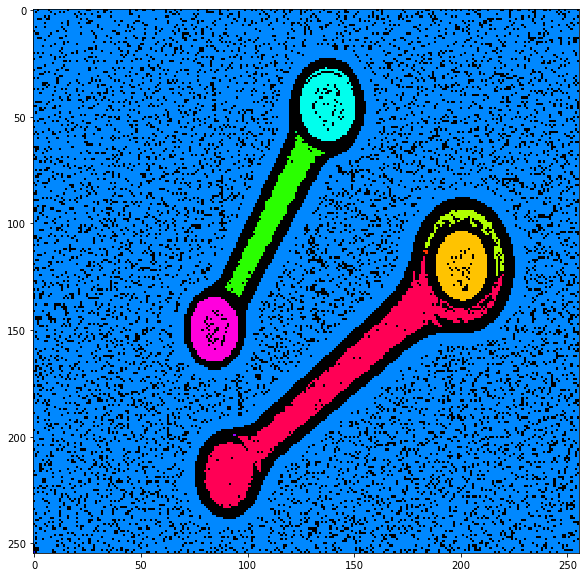

In [10]:
img = cv2.imread('../data/TESI21.BMP', 0)
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
#img = cv2.medianBlur(img, 5)


ret, labels = cv2.connectedComponents(img)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    plt.figure(figsize=(20,10))
    plt.imshow(labeled_img)

imshow_components(labels)

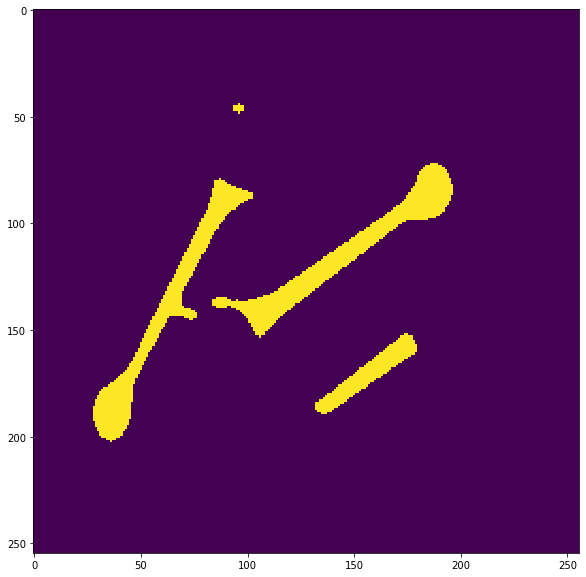

In [11]:
# Read image as gray-scale
img = cv2.imread('../data/TESI50.BMP', cv2.IMREAD_GRAYSCALE)
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
img = cv2.morphologyEx(img, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
plt.figure(figsize=(20,10))
plt.imshow(img)

NameError: name 'th_otsu' is not defined

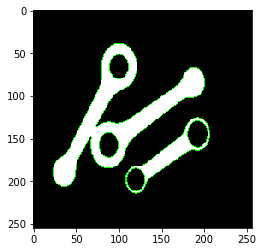

((157.8292694091797, 171.53659057617188), (119.94145202636719, 35.60762023925781), -38.65980911254883)
((111.5840835571289, 136.31298828125), (191.566650390625, 123.11312103271484), -65.79072570800781)


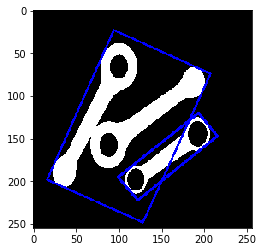

In [14]:
# Find holes with contours

image = cv2.imread('../data/TESI50.BMP', cv2.IMREAD_GRAYSCALE)
ret_otsu, th_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(th_otsu, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
backtorgb = cv2.cvtColor(th_otsu,cv2.COLOR_GRAY2RGB)
image_contours = cv2.drawContours(backtorgb, contours, -1, (0,255,0), 1)
plt.imshow(image_contours)
plt.show()


blobs = []

backtorgb = cv2.cvtColor(th_otsu,cv2.COLOR_GRAY2RGB)

# The generation respects the hierarchical order so the parents come always first
for index, cnt in enumerate(hierarchy[0]):
    if cnt[3] == -1:
        rect = cv2.minAreaRect(contours[index])
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        backtorgb = cv2.drawContours(backtorgb,[box],0,(0,0,255),2)
        
        print(rect)

        blobs.append({"index":index, "contours":contours[index], "holes":[], "box":box, "type": "A"})
    else:
        blobs[len(blobs)-1]["holes"].append({"index":index, "contours":contours[index]})
        holes = len(blobs[len(blobs)-1]["holes"])
        
        if(holes == 2):
            blobs[len(blobs)-1]["type"] = "B"
        elif(holes >= 2):
            # Fix with some morfology and threeshold of area and perimeter
            print("ERROR!")
            
plt.imshow(backtorgb)
plt.show()